# SMS Spam Detection Model using Naive Bayes
## Presented by: Yeruva Sai Jahnavi

# Importing Required Libraries and Loading the Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Load and Inspect the Dataset

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Data Exploration
Load the dataset and check its contents. 'spam.csv' contains information about SMS messages, including whether they are spam or not.

In [3]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df.rename({'v1': 'Type', 'v2': 'Email'}, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Type    5572 non-null   object
 1   Email   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


# Check Class Distribution
Examine the number of spam and valid (ham) messages in the dataset.

In [4]:
spam_count = df[df['Type'] == 'spam']['Type'].count()
ham_count = df[df['Type'] == 'ham']['Type'].count()

In [5]:
print("Spam Emails: ", spam_count)
print("Ham (Valid) Emails: ", ham_count)

Spam Emails:  747
Ham (Valid) Emails:  4825


<Axes: xlabel='Type', ylabel='count'>

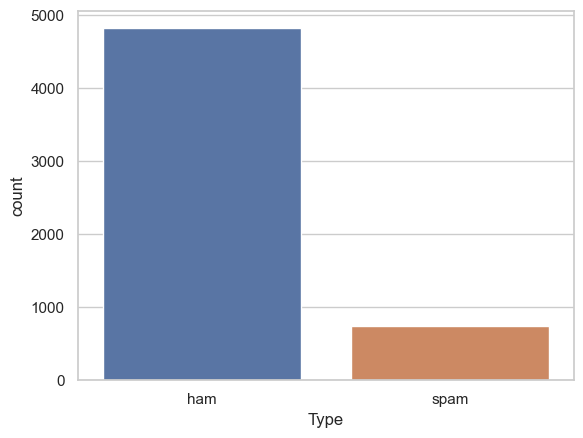

In [6]:
sns.set(style="whitegrid")  # Set the style
sns.countplot(x='Type', data=df)

# Data Preprocessing
Preparing the data for analysis.

In [7]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'Type' Column
Encode the 'Type' column so that the machine learning model can work with it.

In [8]:
encoder = LabelEncoder()
df['Type'] = encoder.fit_transform(df['Type'])
df.head()

,Type,Email
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# Define Dependent and Independent Variables
Separate the dataset into two parts: the text of the SMS messages (X) and their labels (y).

In [9]:
X = df['Email']
y = df['Type']

# Split Data into Training and Testing Sets
Divide the data into two parts: one for training the model and one for testing its performance.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Text Data Transformation
Convert the text data into a format that the model can understand and analyze.

In [11]:
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

# Train a Naive Bayes Model
Naive Bayes algorithm to create a model that learns to distinguish between spam and valid messages.

In [12]:
mnb = MultinomialNB()
mnb.fit(X_train_cv, y_train)

MultinomialNB()

# Evaluate Model Accuracy
Check how well our model can predict whether a message is spam or not.

In [13]:
y_pred = mnb.predict(X_test_cv)
accuracy = accuracy_score(y_test, y_pred)

In [14]:
print("Model Accuracy: {:.2f}%".format(accuracy * 100))

Model Accuracy: 98.21%


# Example Prediction
Make a sample prediction to demonstrate how the model works.

In [37]:
test_email = "Congratulations! You won the lottery!"

# Preprocess and Make Predictions
Process the test email using the same techniques as the training data and predict whether it's spam or not.

In [38]:
test_email_cv = cv.transform([test_email])
prediction = mnb.predict(test_email_cv)

# Interpret Prediction
Interpret the model's prediction to determine whether the test email is spam or not.

In [39]:
if prediction[0] == 1:
    result = "This email is classified as spam."
else:
    result = "This is a valid email."

print("Example Prediction: ", result)

Example Prediction:  This email is classified as spam.
